In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Data

In [7]:
df_main = pd.read_csv('/kaggle/input/smoking-crisis/death-rate-smoking new.csv')
df_main.head()

,Entity,Code,Year,Smoking mortality
0,Afghanistan,AFG,1990,7.583.769
1,African Region (WHO),WHO,1990,8.285.964
2,Albania,ALB,1990,14.721.635
3,Algeria,DZA,1990,14.394.376
4,American Samoa,ASM,1990,15.573.251


In [8]:
print(df_main.columns); df_main.shape

Index(['Entity', 'Code', 'Year', 'Smoking mortality'], dtype='object')


(6840, 4)

In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             6840 non-null   object
 1   Code               6151 non-null   object
 2   Year               6840 non-null   int64 
 3   Smoking mortality  6840 non-null   object
dtypes: int64(1), object(3)
memory usage: 213.9+ KB


There are a number of blanks in code, let's see them

### Data Cleaning

In [10]:
# removing the first points in the Smoking mortality

df_main['Smoking mortality']=df_main['Smoking mortality'].str.replace('.','',1).astype(float)

In [11]:
# finding the empty Code rows and WHO

df_main[(df_main['Code'].isnull())|(df_main['Code']=='WHO')]

,Entity,Code,Year,Smoking mortality
1,African Region (WHO),WHO,1990,8285.964
54,East Asia & Pacific (WB),NaN,1990,18177.223
56,Eastern Mediterranean Region (WHO),NaN,1990,14045.036
60,England,NaN,1990,19016.753
66,Europe & Central Asia (WB),NaN,1990,1531.056
...,...,...,...,...
6799,South Asia (WB),NaN,2019,10052.887
6802,South-East Asia Region (WHO),NaN,2019,1008.099
6805,Sub-Saharan Africa (WB),NaN,2019,51686.256
6834,Wales,NaN,2019,97482.414


In [12]:
# checking for the countries with no code

pd.DataFrame(df_main.loc[(df_main['Code'].isnull())|(df_main['Code']=='WHO') | (df_main['Code']=='OWID_WRL'), 'Entity'].unique(), columns=['Location'])

,Location
0,African Region (WHO)
1,East Asia & Pacific (WB)
2,Eastern Mediterranean Region (WHO)
3,England
4,Europe & Central Asia (WB)
5,European Region (WHO)
6,G20
7,High Income (WB)
8,Latin America & Caribbean (WB)
9,Low Income (WB)


Countries like 'England', 'Scotland', 'Wales' may be under 'United Kingdom', so we need to confirm if 'United Kingdom' is already in the Country list.

We must clean our data of those columns that are a lump of other countries

In [13]:
# Investigating for United Kingdom

df_main[df_main['Entity']=='United Kingdom']

,Entity,Code,Year,Smoking mortality
214,United Kingdom,GBR,1990,19534.468
442,United Kingdom,GBR,1991,19089.902
670,United Kingdom,GBR,1992,1865.898
898,United Kingdom,GBR,1993,1848.551
1126,United Kingdom,GBR,1994,17798.097
1354,United Kingdom,GBR,1995,17484.035
1582,United Kingdom,GBR,1996,16971.165
1810,United Kingdom,GBR,1997,16419.476
2038,United Kingdom,GBR,1998,16027.817
2266,United Kingdom,GBR,1999,15650.082


In [14]:
# dropping rows with no code or WHO

df = df_main.drop(df_main[(df_main['Code'].isnull())| (df_main['Code']=='WHO') | (df_main['Code']=='OWID_WRL')].index)
df.sort_values(['Entity','Year'],inplace=True)
df.drop(columns='Code', axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [15]:
df.dtypes

Entity                object
Year                   int64
Smoking mortality    float64
dtype: object

## EDA

In [16]:
# creating a dataframe of aggregated functions
agg_data = df.groupby('Entity').agg(total_deaths = ('Smoking mortality','sum'),
                                    avg_deaths = ('Smoking mortality','mean'),
                                    max_death_count = ('Smoking mortality','max'),
                                    min_death_count = ('Smoking mortality','min'))

# reseting index
agg_data.reset_index(inplace=True)

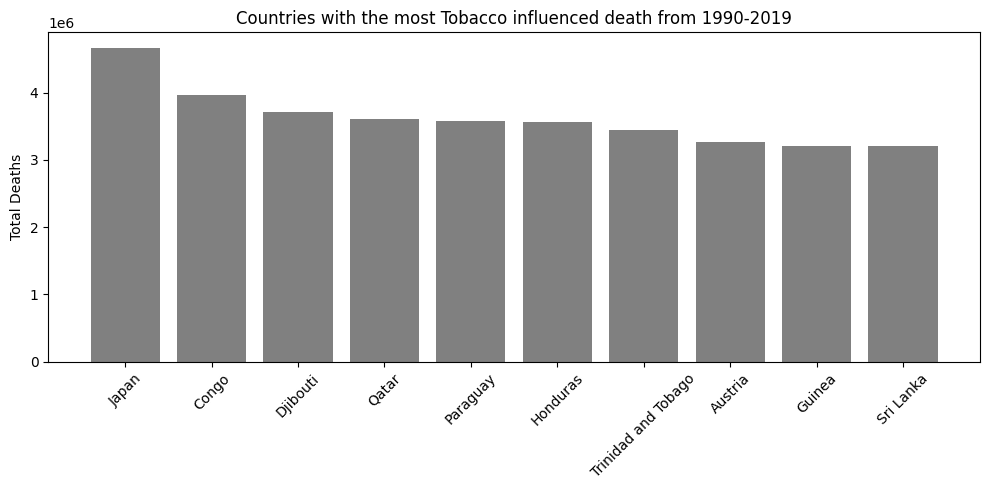

In [17]:
# Top 10 countries with highest death count

TopDeaths = agg_data.sort_values(by='total_deaths', ascending=False)
T10_deaths = TopDeaths.head(10)

plt.figure(figsize=(10,5))

plt.bar(T10_deaths['Entity'],T10_deaths['total_deaths'], color='grey')
plt.xticks(rotation = 45)
plt.ylabel('Total Deaths')
plt.title('Countries with the most Tobacco influenced death from 1990-2019')

plt.tight_layout()
plt.show()

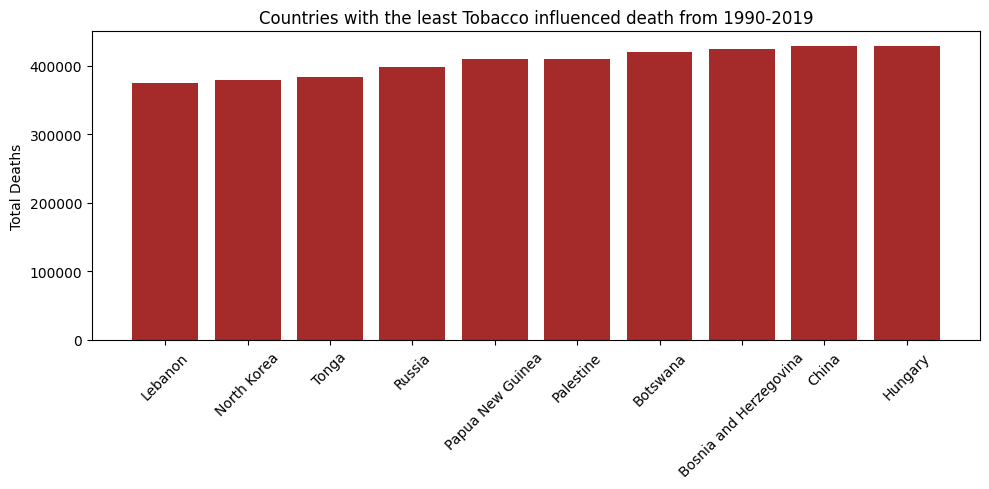

In [18]:
# Top 10 countries with highest death count

B10_deaths = TopDeaths.tail(10).sort_values(by='total_deaths')

plt.figure(figsize=(10,5))

plt.bar(B10_deaths['Entity'],B10_deaths['total_deaths'], color='brown')
plt.xticks(rotation = 45)
plt.ylabel('Total Deaths')
plt.title('Countries with the least Tobacco influenced death from 1990-2019')

plt.tight_layout()
plt.show()

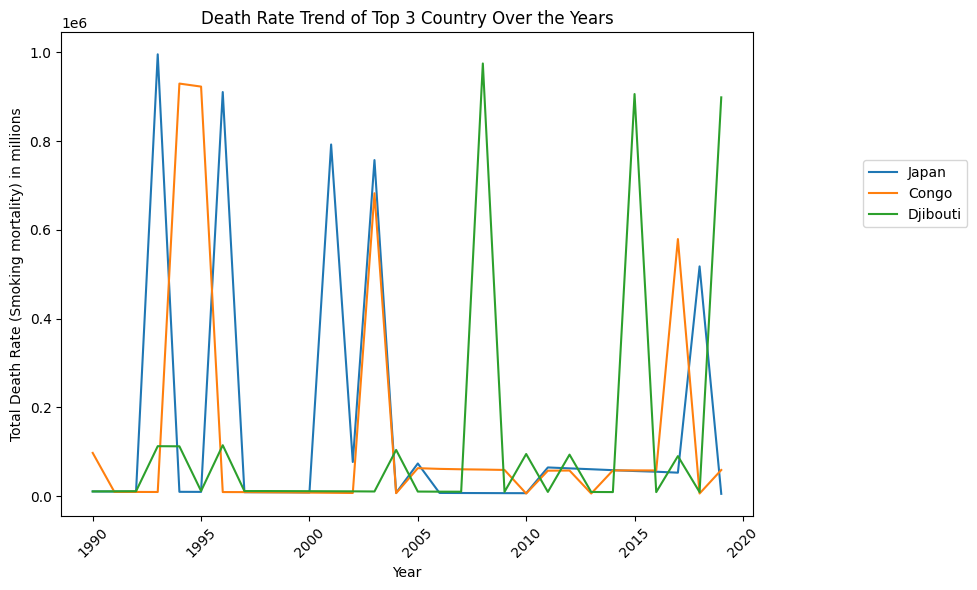

In [19]:
# Death Rate Trend of Top 3 Country Over the Years

T5_deaths = TopDeaths.head(3)

# Get unique countries
countries = T5_deaths['Entity']

# Plot each country's death rate over the years
plt.figure(figsize=(10, 6))
for country in countries:
    # Filter data for the current country
    country_data = df[df['Entity'] == country]
    # Plot the data
    plt.plot(country_data['Year'], country_data['Smoking mortality'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Death Rate (Smoking mortality) in millions')
plt.title('Death Rate Trend of Top 3 Country Over the Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend and show plot
plt.legend(bbox_to_anchor=(1.15, 0.75), loc='upper left')
plt.tight_layout()
plt.show()


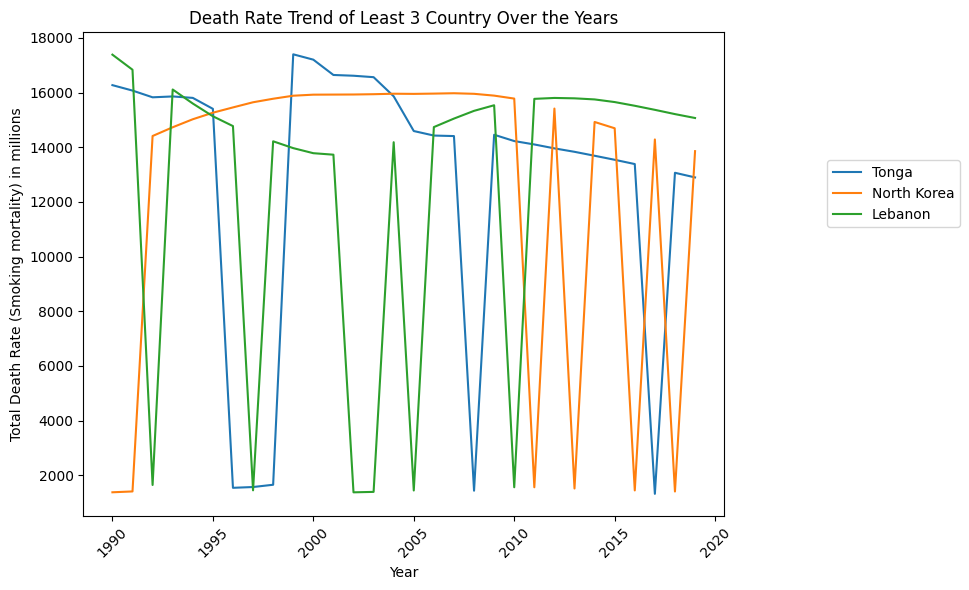

In [20]:
# Death Rate Trend of Least 3 Country Over the Years

BottomDeaths = TopDeaths.sort_values(by= 'total_deaths', ascending=False)
B5_deaths = BottomDeaths.tail(3)
# Get unique countries
countries = B5_deaths['Entity']

# Plot each country's death rate over the years
plt.figure(figsize=(10, 6))
for country in countries:
    # Filter data for the current country
    country_data = df[df['Entity'] == country]
    # Plot the data
    plt.plot(country_data['Year'], country_data['Smoking mortality'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Death Rate (Smoking mortality) in millions')
plt.title('Death Rate Trend of Least 3 Country Over the Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend and show plot
plt.legend(bbox_to_anchor=(1.15, 0.75), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
Year_data = df.groupby('Year').agg(total_deaths=('Smoking mortality','sum'),
                                   avg_deaths=('Smoking mortality','mean'))
Year_data.reset_index(inplace=True)

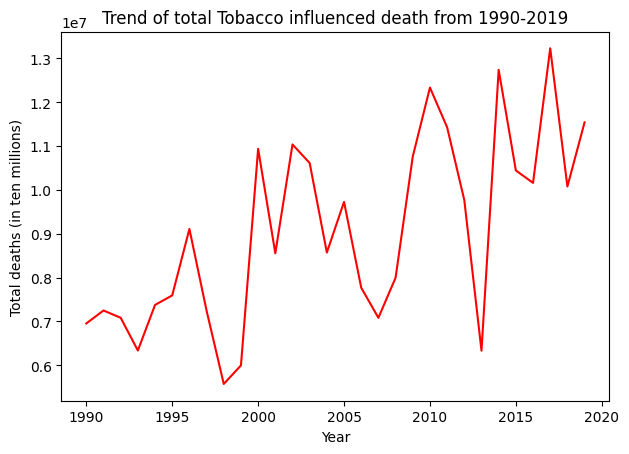

In [22]:
# Trend of total Tobacco influenced death from 1990-2019

plt.plot('Year', 'total_deaths',data=Year_data, label='Year', color='red')

plt.xlabel('Year')
plt.ylabel('Total deaths (in ten millions)')
plt.title('Trend of total Tobacco influenced death from 1990-2019')

plt.tight_layout()
plt.show()

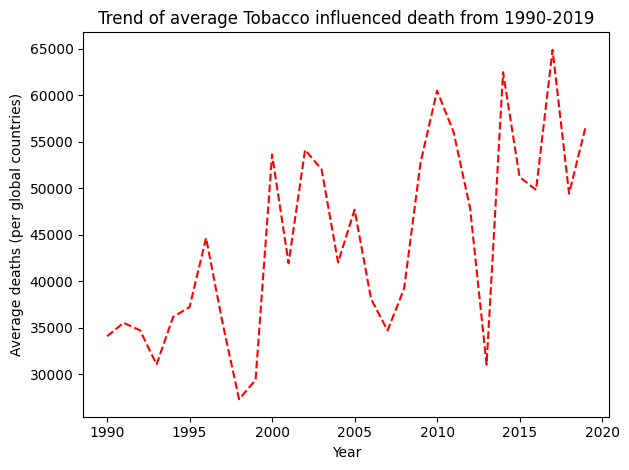

In [23]:
Year_data# Trend of total Tobacco influenced death from 1990-2019

plt.plot('Year', 'avg_deaths','r--',data=Year_data, label='Year')

plt.xlabel('Year')
plt.ylabel('Average deaths (per global countries)')
plt.title('Trend of average Tobacco influenced death from 1990-2019')

plt.tight_layout()
plt.show()